In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.patches import Rectangle
import scipy.stats as st
import os
import csv
import numpy as np
from sqlalchemy import create_engine
from pymongo import MongoClient
import datetime
import json

In [2]:
data = "StateParkDeaths.csv"
state_parks_df = pd.read_csv(data)
state_parks_df.head()

,Rank,Park Name,Death Total,Park Visits (2007-2018),Deaths per 10 Million Visits,State
0,1,North Cascades National Park,19,"291,255",652.35,WA
1,2,Denali National Park & Preserve,59,"5,870,403",100.50,AK
2,3,Upper Delaware Scenic & Recreational River,21,"3,064,806",68.52,DE
3,4,Big Thicket National Preserve,11,"1,643,769",66.92,TX
4,5,Little River Canyon National Preserve,17,"3,199,845",53.13,AL


In [3]:
state_parks_df.rename(columns = {'Death Total':'Park Total Deaths'}, inplace = True)
state_parks_df.head()

,Rank,Park Name,Park Total Deaths,Park Visits (2007-2018),Deaths per 10 Million Visits,State
0,1,North Cascades National Park,19,"291,255",652.35,WA
1,2,Denali National Park & Preserve,59,"5,870,403",100.50,AK
2,3,Upper Delaware Scenic & Recreational River,21,"3,064,806",68.52,DE
3,4,Big Thicket National Preserve,11,"1,643,769",66.92,TX
4,5,Little River Canyon National Preserve,17,"3,199,845",53.13,AL


In [4]:
data2 = "state_reader.csv"
death_state_df = pd.read_csv(data2)
death_state_df.head()

,State,State Abr,Deaths,Population,avg pop
0,Alabama,AL,50.0,57721479.0,5.247407e+06
1,Alaska,AK,12.0,8660471.0,7.873155e+05
2,Arizona,AZ,70.0,79524134.0,7.229467e+06
3,Arkansas,AR,58.0,35333373.0,3.212125e+06
4,California,CA,176.0,457426729.0,4.158425e+07


In [5]:
death_state_df.rename(columns = {'avg pop':'State avg pop', 'Population':'State Population', 'Deaths':'State Deaths'}, inplace = True)
death_state_df.head()

,State,State Abr,State Deaths,State Population,State avg pop
0,Alabama,AL,50.0,57721479.0,5.247407e+06
1,Alaska,AK,12.0,8660471.0,7.873155e+05
2,Arizona,AZ,70.0,79524134.0,7.229467e+06
3,Arkansas,AR,58.0,35333373.0,3.212125e+06
4,California,CA,176.0,457426729.0,4.158425e+07


In [6]:
del death_state_df['State']
death_state_df.head()

,State Abr,State Deaths,State Population,State avg pop
0,AL,50.0,57721479.0,5.247407e+06
1,AK,12.0,8660471.0,7.873155e+05
2,AZ,70.0,79524134.0,7.229467e+06
3,AR,58.0,35333373.0,3.212125e+06
4,CA,176.0,457426729.0,4.158425e+07


In [7]:
death_state_df.rename(columns = {'State Abr':'State'}, inplace = True)
death_state_df.head()

,State,State Deaths,State Population,State avg pop
0,AL,50.0,57721479.0,5.247407e+06
1,AK,12.0,8660471.0,7.873155e+05
2,AZ,70.0,79524134.0,7.229467e+06
3,AR,58.0,35333373.0,3.212125e+06
4,CA,176.0,457426729.0,4.158425e+07


In [8]:
final_data_df = pd.merge(state_parks_df, death_state_df, on="State")
final_data_df.head()

,Rank,Park Name,Park Total Deaths,Park Visits (2007-2018),Deaths per 10 Million Visits,State,State Deaths,State Population,State avg pop
0,1,North Cascades National Park,19,"291,255",652.35,WA,48.0,83575455.0,7.597769e+06
1,8,Mount Rainier National Park,55,"14,583,040",37.72,WA,48.0,83575455.0,7.597769e+06
2,31,Lake Roosevelt National Recreation Area,21,"16,240,491",12.93,WA,48.0,83575455.0,7.597769e+06
3,44,Olympic National Park,29,"37,472,214",7.74,WA,48.0,83575455.0,7.597769e+06
4,2,Denali National Park & Preserve,59,"5,870,403",100.50,AK,12.0,8660471.0,7.873155e+05


In [9]:
final_data_df.to_csv("merged_data.csv", index=False, header=True)

In [10]:
final_data_df.sort_values(by=['State'], inplace=True,ascending=False)
final_data_df.head()

,Rank,Park Name,Park Total Deaths,Park Visits (2007-2018),Deaths per 10 Million Visits,State,State Deaths,State Population,State avg pop
40,26,Grand Teton National Park,54,"34,325,043",15.73,WY,12.0,6844437.0,6.222215e+05
41,32,Yellowstone National Park,51,"43,283,275",11.78,WY,12.0,6844437.0,6.222215e+05
13,6,New River Gorge National River,62,"13,860,271",44.73,WV,36.0,22087457.0,2.007951e+06
25,16,Saint Croix National Scenic Riverway,16,"6,133,431",26.09,WI,58.0,68705559.0,6.245960e+06
0,1,North Cascades National Park,19,"291,255",652.35,WA,48.0,83575455.0,7.597769e+06


In [11]:
state_df = final_data_df.loc[final_data_df['State'] == 'WY']
state_df.head()

,Rank,Park Name,Park Total Deaths,Park Visits (2007-2018),Deaths per 10 Million Visits,State,State Deaths,State Population,State avg pop
40,26,Grand Teton National Park,54,"34,325,043",15.73,WY,12.0,6844437.0,622221.545455
41,32,Yellowstone National Park,51,"43,283,275",11.78,WY,12.0,6844437.0,622221.545455


In [12]:
park_name_df = state_df.groupby('Park Name').max()['Park Total Deaths']
park_name_df.head()

Park Name
Grand Teton National Park    54
Yellowstone National Park    51
Name: Park Total Deaths, dtype: int64

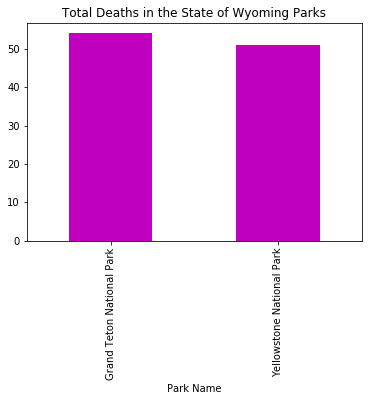

In [13]:
park_name_df.plot(kind= "bar", title="Total Deaths in the State of Wyoming Parks",color = 'm')
plt.show()

In [14]:
plt.savefig("images/Total_Deaths_State_Wyoming_Parks.png")

<Figure size 432x288 with 0 Axes>

In [15]:
#Connect to the default port in Mongodb

client = MongoClient("mongodb://localhost:27017/")

#Declaring the Database
db = client.project2

In [16]:
#Declaring the collection
mergerd_col = db["merged"]   # instance
df = pd.read_csv('merged_data.csv')
data_json = json.loads(df.to_json(orient='records'))
mergerd_col.insert_many(data_json)